Naveeda Ali
<br>
Date: Mar. 20, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__20 points__

- Part (b) /__20 points__

- Part (c) /__20 points__

- Part (d) /__20 points__

- Part (e) /__20 points__



# <center><font color=#46769B>Exercise 10: Linear response theory</font></center>

## <font color=#46769B>Introduction: Damped harmonic oscillator with a driving force</font>

A __driven damped harmonic oscillator__, with a driving force $F(t)$, is governed by the second-order ODE

$$y''(t) + \gamma y'(t) + \omega^2 y(t) = F(t) \, , \qquad (1)$$

where $\omega=1$ is the intrinsic angular frequency of the oscillator and $\gamma=0.3$ is the damping coefficient. We will take oscillator to be initially at rest at $t=0$, with initial condition

$$y(0) = 0 , \quad y'(0) = 0 \, .$$

The external driving force $F(t)$ will be zero at $t < 0$ and it will turn on for $t \ge 0$.

You can think of Eq. (1) as describing a generic system that starts off in equilibrium and then it gets perturbed by some external force. The goal of this exercise is to determine the *response* of the system, i.e., what is $y(t)$ for a given external force $F(t)$. We will take $F(t)$ to be a periodic function.

Here we will use our knowledge of solving ODEs to solve Eq. (1). We will also investigate how Fourier methods can be useful to solve Eq. (1) in the case that $F(t)$ is a periodic function.

The goals of this exercise are:

- Gain familiarity with Fourier series

- Practice with complex numbers in Python

- Review using `solve_ivp`

Required reading:

- *Lesson 10: Fourier Series*

## <font color=#46769B>Part (a): Driving force </font>

Consider a driving function that "turns on" for $t \ge 0$ and is given by a periodic triangular wave, shown here, with period $T=1$:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/triangular_wave.PNG" width="400">
</div>

The functional form of the wave is to be determined by you from this plot. Assume that $F(t)$ is linear except at its minima and maxima, and that it repeats henceforth for $t > 0$.

Your tasks are: 

- Define a function for $F(t)$ (using a `def` statement) corresponding to the driving force $F(t)$ shown above. 

- Use your function to make the plot shown above using your own code.

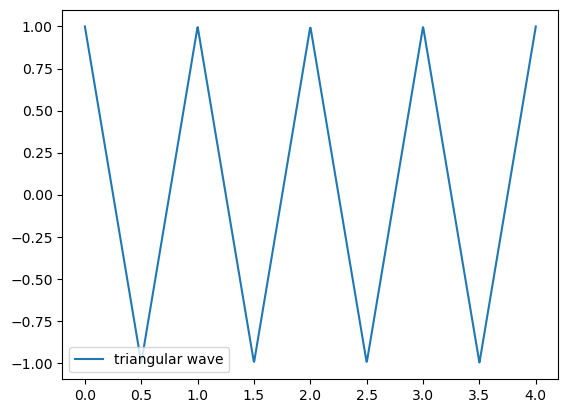

In [1]:
# Your code here for Part (a)
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 4, num=1000) 
#Period of one 
T = 1  

#Define the triangular wave function
def triangular_wave(t):
    if (t >= 0) & (t < T/2):
        return -4*t+1
    if (t >= T/2) & (t < T):
        return 4*t-3
    elif t < 0:
        #Shift t up one period
        return 0
    else:
        # Shift t down one period
        return triangular_wave(t-T)

#Vectorize the triangular wave function
f = np.vectorize(triangular_wave)

#Plot the triangular wave
plt.plot(t, f(t), label='triangular wave')
plt.legend()
plt.show()


## <font color=#46769B>Part (b): Fourier series </font>

Every (reasonably-behaved) periodic function can be expanded in terms of a Fourier series of sine and cosine functions. Here the period of $F(t)$ is $T=1$. The generic Fourier series formula with $T=1$ is

$$F(t) = a_0 + \sum_{k=1}^{\infty} \big( a_k \cos\left( \omega_k t \right) + b_k \sin\left( \omega_k t \right) \big) \qquad (2)$$

where $\omega_k = 2\pi k$ are the frequencies that enter here. According to the lecture notes, the Fourier coefficients can be computed by performing these integrals 

$$a_0 = \int_0^1 dt \, F(t)$$

$$a_k = 2 \int_0^1 dt \, \cos(\omega_k t) \, F(t)$$

$$b_k = 2 \int_0^1 dt \, \sin(\omega_k t) \, F(t)$$

The Fourier coefficients for $F(t)$, given by the triangular wave shown above, are:

$$a_0 = 0 \, , \quad a_k = \left\{ \begin{array}{cc} \frac{8}{\pi^2 k^2} & {\rm for\; odd} \; k > 0 \\ 0 & {\rm for\; even} \; k > 0 \end{array} \right. , \quad b_k = 0 \, ,$$

which you can check by computing the integrals above.

Your tasks are:

- Compute and plot the Fourier series representation of $F(t)$ in Eq. (2) including Fourier modes with $k \le 1$.

- Do the same except with $k \le 3$.

- Do the same except with $k \le 15$.

- Put all Fourier series on the same plot along with your plot from Part (a) to show the agreement.

- Include a legend in your plot and only show one period on the $x$-axis.

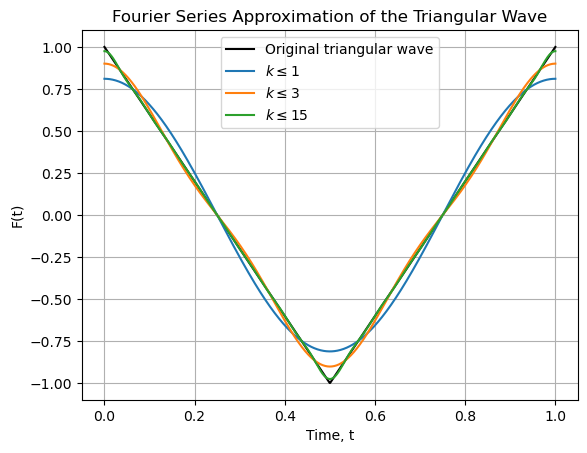

In [2]:
# Your code for Part (b) here

def Fourier_series(t, kmax):
    # First term (constant) in Fourier series
    a0 = 0
    f = a0

    # Sum over k > 0 terms in Fourier series (for odd k)
    for k in range(1,kmax+1,2):  
        ak = (8/(np.pi**2*k**2))  
        bk = 0  
        #Fourier series equation
        f = f + ak*np.cos(2*np.pi*k*t) + bk*np.sin(2*np.pi*k*t)  

    return f

#Time array
t = np.linspace(0, 1, 1000)  

# Plotting the original triangular wave function
plt.plot(t, np.vectorize(triangular_wave)(t), label='Original triangular wave', color='black')

# Plotting the Fourier series for various k values
plt.plot(t, Fourier_series(t, 1), label=r'$k \leq 1$')
plt.plot(t, Fourier_series(t, 3), label=r'$k \leq 3$')
plt.plot(t, Fourier_series(t, 15), label=r'$k \leq 15$')

# Labeling the axes and the plot
plt.xlabel('Time, t')
plt.ylabel('F(t)')
plt.title('Fourier Series Approximation of the Triangular Wave')
plt.grid(True)
plt.legend()
plt.show()

## <font color=#46769B>Part (c): Alternative Fourier series </font>

An equivalent way of writing a Fourier series is in terms of complex exponentials. The generic Fourier series formula complex exponentials is (again with $T=1$)

$$F(t) = \sum_{k = -\infty}^{\infty} c_k  \, e^{i \omega_k t} \qquad (3)$$

where (as above) $\omega_k = 2\pi k$ are the frequencies that enter here. According to the lecture notes, the Fourier coefficients can be computed by performing these integrals 

$$c_k = \int_0^1 dt \, e^{-i \omega_k t} \, F(t) \, , $$

or equivalently

$$\left. \begin{array}{c} c_k = \tfrac{1}{2} (a_k - i b_k) \\ c_{-k} = \tfrac{1}{2}  (a_k + i b_k) \end{array} \right\} \; k > 0$$

so if you know if you know $a_k$ and $b_k$, given in Part (b), you can convert to $c_k$.

Similar to Part (b), your tasks are:

- Compute and plot the __real part__ of the Fourier series representation of $F(t)$ in Eq. (3) including Fourier modes with $|k| \le 1$.

- Do the same except with $|k| \le 3$.

- Do the same except with $|k| \le 15$.

- Put all Fourier series on the same plot along with your plot from Part (a) to show the agreement.

- Include a legend in your plot and only show one period on the $x$-axis.

Next, on a separate plot, repeat these steps plotting the __imaginary part__ of the Fourier series representation of $F(t)$ in Eq. (3). Note that the $F(t)$ is a real function, so the imaginary part should be zero. This is a cross-check that the imaginary part of the Fourier series you compute should be zero (up to numerical accuracy).


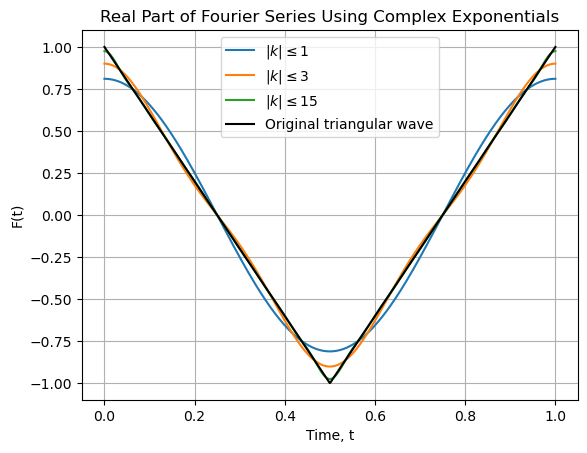

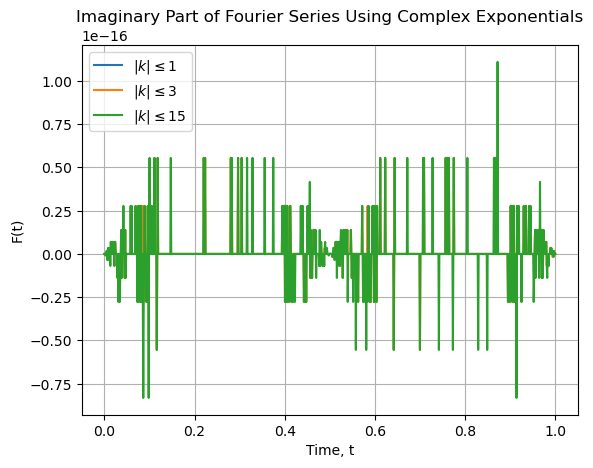

In [3]:
# Fourier series using complex exponentials as per the provided format

def Fourier_series(t, kmax):
    T = 1
    # First term (constant) in Fourier series
    c0 = 0
    f = c0
    
    #Sum over odd k > 0 terms in Fourier series
    for k in range(1,kmax+1,2):
        ck = 4/(np.pi**2*k**2)  
        f = f + ck*np.exp(1j*2*np.pi*k*t/T)
        
    #Sum over odd k < 0 terms in Fourier series
    for k in range(-kmax,0,2):
        ck = 4/(np.pi**2*k**2)  
        f = f + ck*np.exp(1j*2*np.pi*k*t/T)
        
    return f

#Time array
t = np.linspace(0, 1, 1000)  

#Plotting real parts
plt.plot(t, Fourier_series(t, 1).real, label=r'$|k| \leq 1$')
plt.plot(t, Fourier_series(t, 3).real, label=r'$|k| \leq 3$')
plt.plot(t, Fourier_series(t, 15).real, label=r'$|k| \leq 15$')

#Plotting original triangular wave function
plt.plot(t, np.vectorize(triangular_wave)(t), label='Original triangular wave', color='black')

#Labeling the axes and the plot
plt.xlabel('Time, t')
plt.ylabel('F(t)')
plt.title('Real Part of Fourier Series Using Complex Exponentials')
plt.grid(True)
plt.legend()
plt.show()

#Plotting imaginary part 
plt.plot(t, Fourier_series(t, 1).imag, label=r'$|k| \leq 1$')
plt.plot(t, Fourier_series(t, 3).imag, label=r'$|k| \leq 3$')
plt.plot(t, Fourier_series(t, 15).imag, label=r'$|k| \leq 15$')

#Labeling the axes and the plot
plt.xlabel('Time, t')
plt.ylabel('F(t)')
plt.title('Imaginary Part of Fourier Series Using Complex Exponentials')
plt.grid(True)
plt.legend()
plt.show()



## <font color=#46769B>Part (d): Damped harmonic oscillator</font>

Now we will return to the damped harmonic oscillator with a driving force.

Perform the following tasks:

- Write a code that will solve Eq. (1) numerically using `scipy.integrate.solve_ivp` over the range $[0,50]$ for $t$, using your driving force $F(t)$ in Part (a).

- Plot your solution for $y(t)$ as a function of $t$. Be sure to include a legend and axis labels. Also, change the size of the plot using `plt.figure(figsize=(12,4))` so that the oscillatory features are clear.

Hints for using `solve_ivp` (documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)):

- The syntax for `solve_ivp` is
```py
sol = solve_ivp(f,[t0,tf],y0)
t = sol.t
y = sol.y
```
where `f` is $f(t,y)$, the function for the right-hand side of your ODE (one you right your ODE as a system of coupled first-order ODEs as in Runge-Kutta algorithms.

- `t` is the list of time points.

- `y` is the matrix of $(y_1,y_2)$ values, where $y_1 = y$ and $y_2 = y^\prime$, at each time step.

- Set the `t_eval=np.linspace(0,50,num=2000)` keyword so that you get a dense enough number of $t$ points out to make a nice plot.

- Set the keywords `atol=1e-6` and `rtol=1e-6` to increase the convergence tolerance settings in `solve_ivp` from their default values.


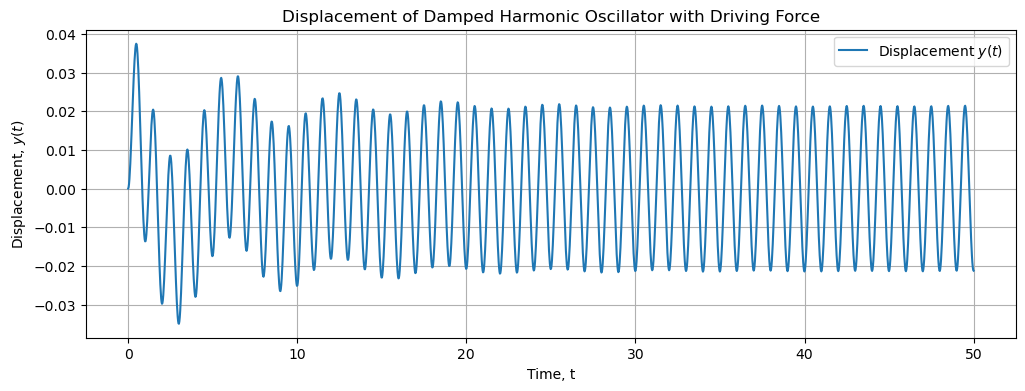

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define the triangular wave function (driving force)
def triangular_wave(t):
    T = 1
    t = t % T
    if (t >= 0) & (t < T/2):
        return -4*t+1
    if (t >= T/2) & (t < T):
        return 4*t-3
    elif t < 0:
        #Shift t up one period
        return 0
    else:
        # Shift t down one period
        return triangular_wave(t-T)

#Define the damped harmonic oscillator with driving force 
def damped_oscillator(t, y, gamma=0.3,omega=1):
    y1 = y[1]
    y2 = -gamma*y[1] - omega**2*y[0] + triangular_wave(t)
    return [y1,y2]

#Given values 
y0 = [0,0]
t_span = [0, 50]
t_eval = np.linspace(0,50,num=2000)

#Find solutions using solve_ivp
sol = solve_ivp(damped_oscillator, t_span, y0, t_eval=t_eval, atol=1e-6, rtol=1e-6)

#Plotting the solution
plt.figure(figsize=(12, 4))
plt.plot(sol.t, sol.y[0], label='Displacement $y(t)$')
plt.xlabel('Time, t')
plt.ylabel('Displacement, $y(t)$')
plt.title('Displacement of Damped Harmonic Oscillator with Driving Force')
plt.legend()
plt.grid(True)
plt.show()


## <font color=#46769B>Part (e): Linear response theory</font>

The main idea is:

> The response of the sum = The sum of the responses

The *response of the sum* means *the response of the system $y(t)$ to the total driving force applied $F(t)$*, i.e., what you calculated in Part (d).

Here we will calculate the same answer using a different method. The *sum of the responses* means:

- We will divide up the total force $F(t)$ into a sum of different Fourier modes, as in Part (c).

- We will calculate the response of the system to each Fourier mode by itself.

- The total response $y(t)$ is the sum of the individual responses.

The advantage here is that everything will be analytic and applies to *any* periodic function $F(t)$. As long as you can calculate the Fourier coefficients, you can solve the ODE analytically no matter how complicated $F(t)$ may be.

### <font color=#46769B>Derivation</font>

We saw in Parts (b) and (c) that we could divide up the driving force into a Fourier series. Here we will solve for the response of the system to each Fourier mode by itself. That is, we will solve the same ODE

$$y''(t) + \gamma y'(t) + \omega^2 y(t) = e^{i \omega_k t}$$

with the same parameters $\omega=1$ and $\gamma=0.3$. But we will replace the driving force with the Fourier mode (complex exponential), where $\omega_k = 2\pi k$, and for a given value of $k$ that is a positive or negative integer.

The advantage is that we can solve Eq. (4) analytically. The idea is:

- Guess the solution of the form $y(t) = A e^{i \omega_k t}$, where $A$ is a constant.

- Plug that into Eq. (4) and solve for the (complex) amplitude $A$.

We get

$$(\omega_k^2 + i \omega_k \gamma + \omega^2) A e^{i \omega_k t} = e^{i \omega_k t}$$

Solving for $A$ we get

$$A = \frac{1}{\omega_k^2 + i \omega_k \gamma + \omega^2}$$

Now the solution for $y$ is

$$y^{(k)}(t) = \frac{e^{i \omega_k t}}{\omega_k^2 + i \omega_k \gamma + \omega^2}$$

where we attach an extra label $(k)$ to the solution since it was the solution for a given Fourier mode $k$. 

Next, we can build the total response by adding up the individual responses to each Fourier mode:

$$y(t) = \sum_k c_k y^{(k)}(t) = \sum_k \frac{c_k e^{i \omega_k t}}{\omega_k^2 + i \omega_k \gamma + \omega^2} \qquad (4)$$

where $c_k$ are  *the same Fourier coefficients* you calculated for $F(t)$ in Part (c).

There are two limitations here:

- The method here only applies to *linear* ODEs.

- The method only gives the *late-time behavior* of the solution. The reason is that the Fourier series solution assumes that $F(t)$ is periodic, whereas we are assuming it "turns-on" at $t=0$ which breaks the periodicity. So, there will be an initial transient phase not described by the Fourier solution, which then decays away, and then the solution will agree with the Fourier series solution.

### <font color=#46769B>Tasks</font>

Your tasks are as follows:

- Plot the Fourier Series solution for the real part of $y(t)$ given in Eq. (4), over the range $[0,50]$, including Fourier modes with $|k| \le 15$. On the same plot, show your numerical solution from Part (d). Include a legend and axis labels in your plot. Use the same `figsize` keyword as in Part (d).

- Make a separate plot for the imaginary part of $y(t)$ in Eq. (4), over the range $[0,50]$, including Fourier modes with $|k| \le 15$. This should be zero if you have done things correctly and is a good cross-check.


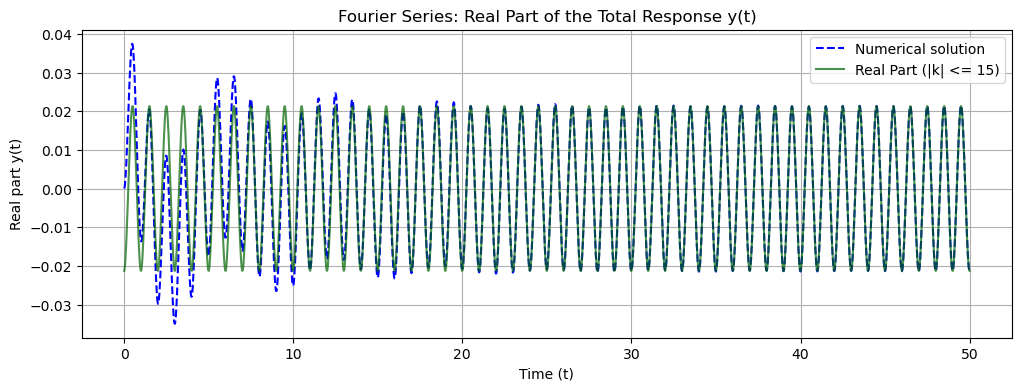

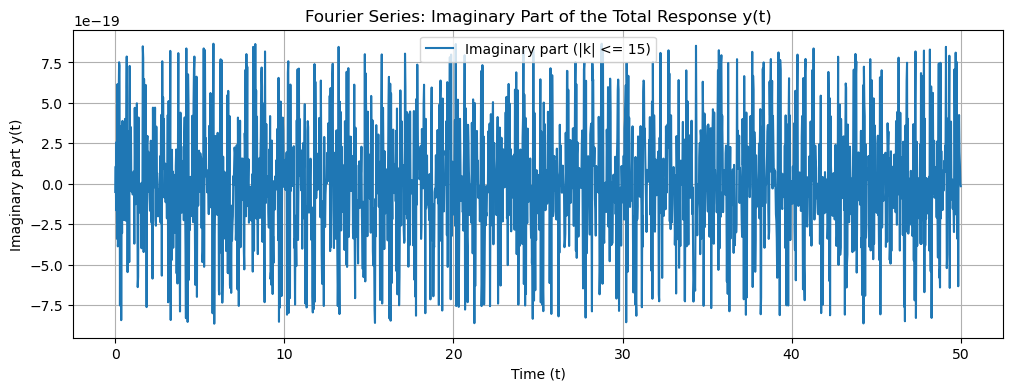

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Triangular wave function 
def triangular_wave(t):
    T = 1
    t = t % T
    if (t >= 0) & (t < T/2):
        return -4*t+1
    if (t >= T/2) & (t < T):
        return 4*t-3
    elif t < 0:
        #Shift t up one period
        return 0
    else:
        # Shift t down one period
        return triangular_wave(t-T)
    
#Damped harmonic oscillator with driving force
def damped_oscillator(t, y, gamma=0.3,omega=1):
    y1 = y[1]
    y2 = -gamma*y[1]- omega**2*y[0] + triangular_wave(t)
    return [y1,y2]

#Given values 
y0 = [0, 0]
t_span = [0, 50]
t_eval = np.linspace(0,50,num=2000)
sol = solve_ivp(damped_oscillator, t_span, y0, t_eval=t_eval, atol=1e-6, rtol=1e-6)

#Fourier series solution definition
def fourier(t, k_max):
    omega = 1
    gamma = 0.3
    series = np.zeros_like(t, dtype=complex)
    for k in range(-k_max,k_max+1):
        omega_k = 2*np.pi*k
        ck = 1/2*(8/(np.pi**2*k**2) if k%2==1 else 0) if k!=0 else 0
        A = 1 / (-omega_k** 2+1j*omega_k* gamma+omega**2)
        series += ck*A*np.exp(1j*omega_k* t)
    return series

#Calculate Fourier series solution with |k| <= 15
t = np.linspace(0, 50, num=2000)
yfourier_15 = fourier(t, 15)

#Plotting numerical solutions and real part of Fourier series
plt.figure(figsize=(12, 4))
plt.plot(sol.t, sol.y[0], label='Numerical solution', color='blue',linestyle='--')
plt.plot(t, yfourier_15.real, label='Real Part (|k| <= 15)', color='darkgreen',alpha=0.7)
plt.xlabel('Time (t)')
plt.ylabel('Real part y(t)')
plt.title('Fourier Series: Real Part of the Total Response y(t)')
plt.legend()
plt.grid(True)
plt.show()

#Plotting the imaginary part of the Fourier series
plt.figure(figsize=(12, 4))
plt.plot(t, yfourier_15.imag, label='Imaginary part (|k| <= 15)')
plt.xlabel('Time (t)')
plt.ylabel('Imaginary part y(t)')
plt.title('Fourier Series: Imaginary Part of the Total Response y(t)')
plt.legend()
plt.grid(True)
plt.show()
